# PCA

This notebook uses the `pca` Python library to perform Principal Component Analysis and to create insightful plots.

The data for this example is taken from the R built-in dataset state.x77, a compilation of data about the US states put together from the 1977 Statistical Abstract of the United
States, with the actual measurements mostly made a few years before.

The variables are:
* Population in thouusands
* Income dollars per capita
* Illiterarcy Percent of the population
* Life Exp Years of life expectancy at birth
* Murder Number of murders and non-negligent manslaughters per 100,000 people
* HS Grad Percent of adults who were high-school graduates
* Frost Mean number of days per year with low temperatures below freezing
* Area In square miles

In [1]:
%pip install pca
from pca import pca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('x77.csv')
df.head()

,Unnamed: 0,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361


#### Data prep

Update the column names.

In [3]:
df.columns

Index(['Unnamed: 0', 'Population', 'Income', 'Illiteracy', 'Life.Exp',
       'Murder', 'HS.Grad', 'Frost', 'Area'],
      dtype='object')

Rename columns and set the index as the `State` column.

In [4]:
df.rename(columns={'Unnamed: 0':'State', 'Life.Exp':'Life_exp', 'HS.Grad':'HS_grad'}, errors='raise', inplace=True)
df.set_index('State', inplace=True)
df.head()

,Population,Income,Illiteracy,Life_exp,Murder,HS_grad,Frost,Area
State,,,,,,,,
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361


#### Model and visualize (no scaling)

In [5]:
# Initialize
model = pca(n_components=8)

# Fit transform
out_noscale = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


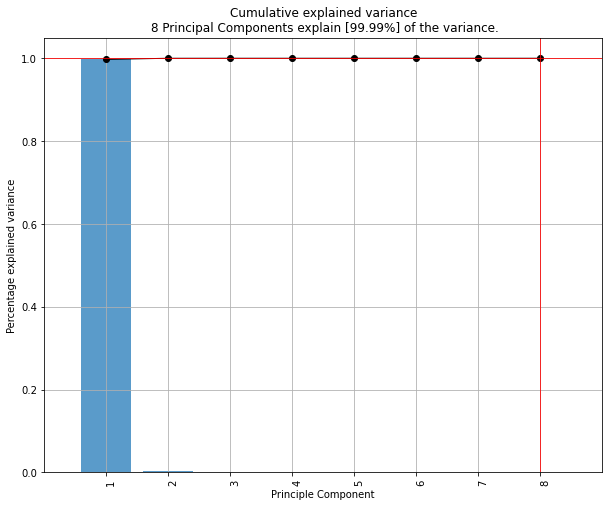

<Figure size 432x288 with 0 Axes>

In [6]:
# Plot explained variance
fig, ax = model.plot()

In [7]:
out_noscale['explained_var']

array([0.99722615, 0.99995688, 0.9999997 , 0.99999999, 1.        ,
       1.        , 1.        , 1.        ])

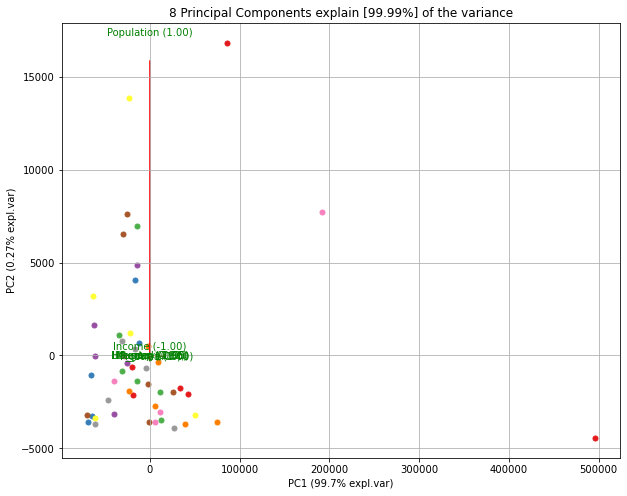

In [8]:
# Make biplot with the number of features
# fig, ax = model.biplot(n_feat=8)
fig, ax = model.biplot(n_feat=8, legend=False, label=False)

#### PCA with data scaled to unit variance

Center and scale the data.

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
df = pd.DataFrame(data=X, index=df.index, columns=df.columns)

In [10]:
# Initialize
model = pca(n_components=8)

# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


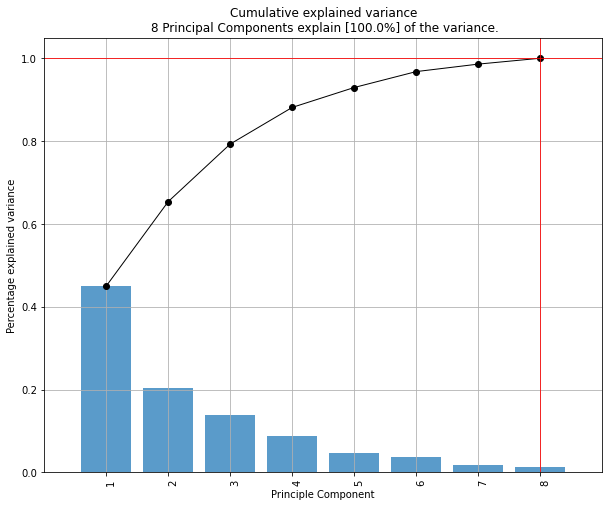

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot explained variance
fig, ax = model.plot()

In [12]:
out['explained_var']

array([0.44986195, 0.65385185, 0.7928445 , 0.88128252, 0.92936273,
       0.96779544, 0.98585154, 1.        ])

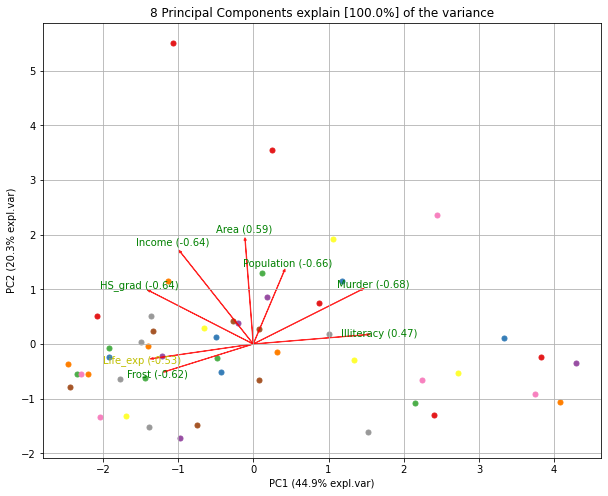

In [13]:
# Make biplot with the number of features
# fig, ax = model.biplot(n_feat=8, legend=False)
fig, ax = model.biplot(n_feat=8, legend=False, label=False)

In [14]:
out['topfeat']

,PC,feature,loading,type
0,PC1,Illiteracy,0.467669,best
1,PC2,Area,0.587624,best
2,PC3,Population,-0.656325,best
3,PC4,Frost,-0.618651,best
4,PC5,Income,-0.637587,best
5,PC6,HS_grad,-0.644646,best
6,PC7,Illiteracy,0.619800,best
7,PC8,Murder,-0.678251,best
8,PC8,Life_exp,-0.527433,weak


***
### Citation
  
Title: pca <br>
Author: Erdogan Taskesen <br>
Year: 2019 <br>
Published: https://github.com/erdogant/pca